# SIFT (Scale Invariant Feature Transformations) Technique for Image Matching 

## Introduction

Take a look at the below collection of images and think of the common element between them:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/Screenshot-from-2019-09-20-17-49-55.png)

* The resplendent Eiffel Tower, of course! The keen-eyed among you will also have noticed that each image has a different background, is captured from different angles, and also has different objects in the foreground (in some cases).

* I’m sure all of this took you a fraction of a second to figure out. It doesn’t matter if the image is rotated at a weird angle or zoomed in to show only half of the Tower. This is primarily because you have seen the images of the Eiffel Tower multiple times and your memory easily recalls its features. We naturally understand that the scale or angle of the image may change but the object remains the same.

* But machines have an almighty struggle with the same idea. It’s a challenge for them to identify the object in an image if we change certain things (like the angle or the scale). Here’s the good news – machines are super flexible and we can teach them to identify images at an almost human-level.

## Introduction to SIFT

> SIFT, or Scale Invariant Feature Transform, is a feature detection algorithm in Computer Vision.

> SIFT helps locate the local features in an image, commonly known as the ‘keypoints‘ of the image. These keypoints are scale & rotation invariant that can be used for various computer vision applications, like image matching, object detection, scene detection, etc.

> We can also use the keypoints generated using SIFT as features for the image during model training. The major advantage of SIFT features, over edge features or hog features, is that they are not affected by the size or orientation of the image.

> For example, here is another image of the Eiffel Tower along with its smaller version. The keypoints of the object in the first image are matched with the keypoints found in the second image. The same goes for two images when the object in the other image is slightly rotated. Amazing, right?


![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/10/Screenshot-from-2019-10-01-16-08-16.png)

* Let’s understand how these keypoints are identified and what are the techniques used to ensure the scale and rotation invariance. Broadly speaking, the entire process can be divided into 4 parts:

1. Constructing a Scale Space: To make sure that features are scale-independent
2. Keypoint Localisation: Identifying the suitable features or keypoints
3. Orientation Assignment: Ensure the keypoints are rotation invariant
4. Keypoint Descriptor: Assign a unique fingerprint to each keypoint

Finally, we can use these keypoints for feature matching!

## Constructing the Scale Space

* We need to identify the most distinct features in a given image while ignoring any noise. Additionally, we need to ensure that the features are not scale-dependent. These are critical concepts so let’s talk about them one-by-one.

* We use the Gaussian Blurring technique to reduce the noise in an image.

* So, for every pixel in an image, the Gaussian Blur calculates a value based on its neighboring pixels. Below is an example of image before and after applying the Gaussian Blur. As you can see, the texture and minor details are removed from the image and only the relevant information like the shape and edges remain:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/index_110.png)

* Gaussian Blur successfully removed the noise from the images and we have highlighted the important features of the image. Now, we need to ensure that these features must not be scale-dependent. This means we will be searching for these features on multiple scales, by creating a ‘scale space’.

* Scale space is a collection of images having different scales, generated from a single image.

* Hence, these blur images are created for multiple scales. To create a new set of images of different scales, we will take the original image and reduce the scale by half. For each new image, we will create blur versions as we saw above.

* Here is an example to understand it in a better manner. We have the original image of size (275, 183) and a scaled image of dimension (138, 92). For both the images, two blur images are created:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/index_21.png)

* You might be thinking – how many times do we need to scale the image and how many subsequent blur images need to be created for each scaled image? The ideal number of octaves should be four, and for each octave, the number of blur images should be five.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/Screenshot-from-2019-09-24-18-27-46.png)

### Difference of Gaussian

* So far we have created images of multiple scales (often represented by σ) and used Gaussian blur for each of them to reduce the noise in the image. Next, we will try to enhance the features using a technique called Difference of Gaussians or DoG.

* Difference of Gaussian is a feature enhancement algorithm that involves the subtraction of one blurred version of an original image from another, less blurred version of the original.

* DoG creates another set of images, for each octave, by subtracting every image from the previous image in the same scale. Here is a visual explanation of how DoG is implemented:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/Screenshot-from-2019-09-25-12-48-03.png)

* Let us create the DoG for the images in scale space. Take a look at the below diagram. On the left, we have 5 images, all from the first octave (thus having the same scale). Each subsequent image is created by applying the Gaussian blur over the previous image.

* On the right, we have four images generated by subtracting the consecutive Gaussians. The results are jaw-dropping!

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/Screenshot-from-2019-09-25-14-18-26.png)

## Keypoint Localization

* Once the images have been created, the next step is to find the important keypoints from the image that can be used for feature matching. The idea is to find the local maxima and minima for the images. This part is divided into two steps:

1. Find the local maxima and minima
2. Remove low contrast keypoints (keypoint selection)
 

### Local Maxima and Local Minima

* To locate the local maxima and minima, we go through every pixel in the image and compare it with its neighboring pixels.

* When I say ‘neighboring’, this not only includes the surrounding pixels of that image (in which the pixel lies), but also the nine pixels for the previous and next image in the octave.

* This means that every pixel value is compared with 26 other pixel values to find whether it is the local maxima/minima. For example, in the below diagram, we have three images from the first octave. The pixel marked x is compared with the neighboring pixels (in green) and is selected as a keypoint if it is the highest or lowest among the neighbors:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/Screenshot-from-2019-09-25-16-50-01.png)

* We now have potential keypoints that represent the images and are scale-invariant. We will apply the last check over the selected keypoints to ensure that these are the most accurate keypoints to represent the image.

 

### Keypoint Selection

* Kudos! So far we have successfully generated scale-invariant keypoints. But some of these keypoints may not be robust to noise. This is why we need to perform a final check to make sure that we have the most accurate keypoints to represent the image features.

* Hence, we will eliminate the keypoints that have low contrast, or lie very close to the edge.

* To deal with the low contrast keypoints, a second-order Taylor expansion is computed for each keypoint. If the resulting value is less than 0.03 (in magnitude), we reject the keypoint.

* So what do we do about the remaining keypoints? Well, we perform a check to identify the poorly located keypoints. These are the keypoints that are close to the edge and have a high edge response but may not be robust to a small amount of noise. A second-order Hessian matrix is used to identify such keypoints. You can go through the math behind this here.

* Now that we have performed both the contrast test and the edge test to reject the unstable keypoints, we will now assign an orientation value for each keypoint to make the rotation invariant.



## Orientation Assignment

* At this stage, we have a set of stable keypoints for the images. We will now assign an orientation to each of these keypoints so that they are invariant to rotation. We can again divide this step into two smaller steps:

1. Calculate the magnitude and orientation
2. Create a histogram for magnitude and orientation

### Calculate Magnitude and Orientation

Consider the sample image shown below:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/Screenshot-from-2019-09-25-19-22-24.png)

* Let’s say we want to find the magnitude and orientation for the pixel value in red. For this, we will calculate the gradients in x and y directions by taking the difference between 55 & 46 and 56 & 42. This comes out to be Gx = 9 and Gy = 14 respectively.

* Once we have the gradients, we can find the magnitude and orientation using the following formulas:

> Magnitude =  √[(Gx)2+(Gy)2]  =  16.64

> Φ = atan(Gy / Gx) = atan(1.55) = 57.17

* The magnitude represents the intensity of the pixel and the orientation gives the direction for the same.

* We can now create a histogram given that we have these magnitude and orientation values for the pixels.

### Creating a Histogram for Magnitude and Orientation

* On the x-axis, we will have bins for angle values, like 0-9, 10 – 19, 20-29, up to 360. Since our angle value is 57, it will fall in the 6th bin. The 6th bin value will be in proportion to the magnitude of the pixel, i.e. 16.64.  We will do this for all the pixels around the keypoint.

This is how we get the below histogram:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/Screenshot-from-2019-09-26-18-53-12.png)

* This histogram would peak at some point. The bin at which we see the peak will be the orientation for the keypoint. Additionally, if there is another significant peak (seen between 80 – 100%), then another keypoint is generated with the magnitude and scale the same as the keypoint used to generate the histogram. And the angle or orientation will be equal to the new bin that has the peak.

* Effectively at this point, we can say that there can be a small increase in the number of keypoints.

## Keypoint Descriptor

* This is the final step for SIFT. So far, we have stable keypoints that are scale-invariant and rotation invariant. In this section, we will use the neighboring pixels, their orientations, and magnitude, to generate a unique fingerprint for this keypoint called a ‘descriptor’.

* Additionally, since we use the surrounding pixels, the descriptors will be partially invariant to illumination or brightness of the images.

* We will first take a 16×16 neighborhood around the keypoint. This 16×16 block is further divided into 4×4 sub-blocks and for each of these sub-blocks, we generate the histogram using magnitude and orientation.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/Screenshot-from-2019-09-26-20-10-52.png)

At this stage, the bin size is increased and we take only 8 bins (not 36). Each of these arrows represents the 8 bins and the length of the arrows define the magnitude. So, we will have a total of 128 bin values for every keypoint.

# Lets Draw key points for Eifel tower

[ WARN:0] global /Users/runner/miniforge3/conda-bld/libopencv_1612623446098/work/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


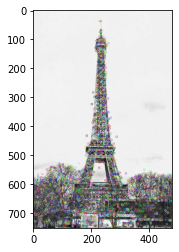

In [1]:
import cv2 
#!pip install requests
import requests
import matplotlib.pyplot as plt
import time

img_data = requests.get('https://images.pexels.com/photos/441585/pexels-photo-441585.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1').content
with open('Eifeltower1.jpg', 'wb') as handler:
    handler.write(img_data)


img_data = requests.get('https://images.pexels.com/photos/440305/pexels-photo-440305.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1').content
with open('Eifeltower2.jpg', 'wb') as handler:
    handler.write(img_data)


import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('Eifeltower1.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

## Feature Matching

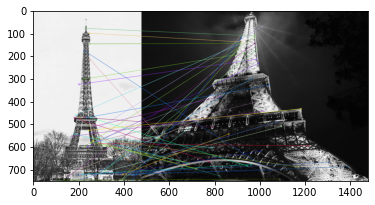

(<matplotlib.image.AxesImage at 0x7fcff808a5e0>, None)

In [2]:
# read images
img1 = cv2.imread('Eifeltower1.jpg')  
img2 = cv2.imread('Eifeltower2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

# Lets use the Live Cam

In [3]:
#sift
sift = cv2.SIFT_create()

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)


cap = cv2.VideoCapture(0)

while cap.isOpened():
    # read images

    suc, img1 = cap.read()
    img2 = img1
    start = time.time()

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    end = time.time()
    totalTime = end - start

    fps = 1 / totalTime
    #print("FPS: ", fps)
    

    img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[700:1100], img2, flags=2)
    #plt.imshow(img3),plt.show()
    cv2.putText(img3, f'FPS: {int(fps)}', (20,450), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 2)
    cv2.imshow('SIFT', img3)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()